## OSM Bootcamp 2018 Exercise Set 1: Rebekah Dix


#### John Stachurski

### Exercise 1

Let $X$ be an $n \times n$ matrix with all positive elements.  The spectral radius $r(X)$ of $X$ is maximum of $|\lambda|$ over all eigenvalues $\lambda$ of $X$, where $|\cdot|$ is the modulus of a complex number.

A version of the **local spectral radius theorem** states that if $X$ has all positive entries and $v$ is any strictly positive $n \times 1$ vector, then

$$
    \lim_{i \to \infty} \| X^i v \|^{1/i} \to r(X) 
    \qquad \qquad \text{(LSR)}
$$

where $\| \cdot \|$ is the usual Euclidean norm.

Intuitively, the norm of the iterates of a positive vector scale like $r(X)$ asymptotically.

The data file `matrix_data.txt` contains the data for a single matrix $X$.  

1. Read it in and compute the spectral raduis using the tools for working with eigenvalues in `scipy.linalg`.

2. Test the claim in (LSR) iteratively, computing $\| X^i v \|^{1/i}$ for successively larger values of $i$.  See if the sequence so generated converges to $r(A)$.

In [16]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [17]:
# Read in the matrix
mat = np.loadtxt('matrix_data.txt')
# Check dimensions
dim = np.shape(mat)

# mat is square so we can use numpy.linalg.eig
eigenvalues, v1 = np.linalg.eig(mat)
absValEigenvalues = np.absolute(eigenvalues)
spectralRadius = np.max(absValEigenvalues)
print(spectralRadius)

1.0044277694480632


In [40]:
numIts = 100
resultStore = np.zeros((numIts-1,1))
v = np.random.randint(1, 10, size=(10,1))

matPower = mat
for ii in range(1, numIts):
    matPower = matPower @ mat
    resultStore[ii-1] = np.linalg.norm(matPower @ v) ** (1 / ii)

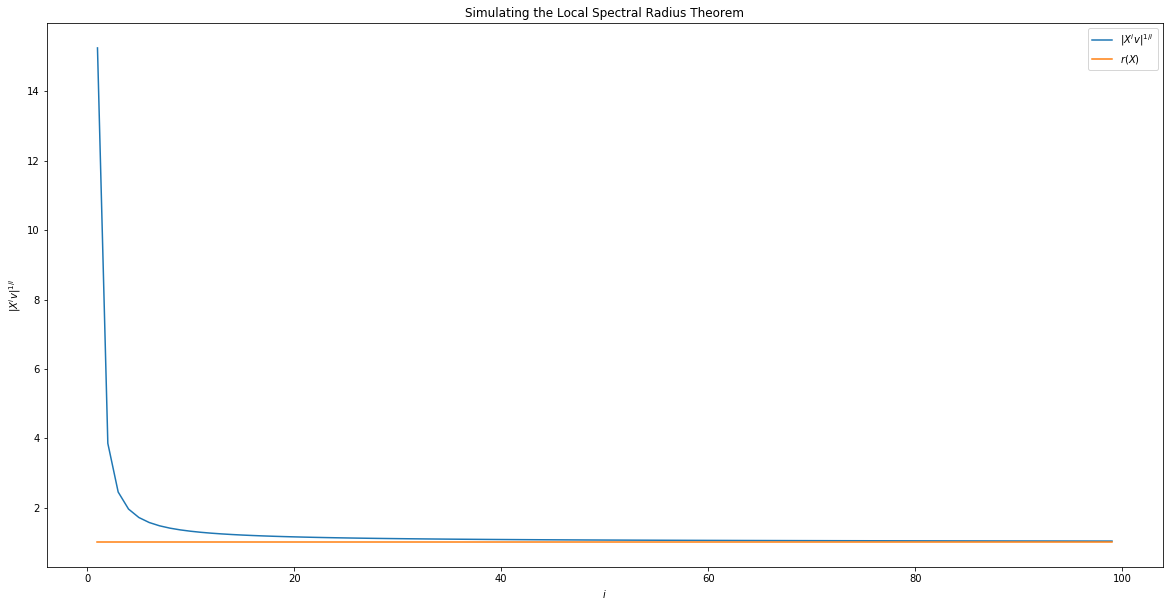

In [39]:
its = np.linspace(1,numIts-1,numIts-1)
plt.figure(figsize=(20,10))
plt.plot(its, resultStore, label=r'$\| X^i v \|^{1/i}$')
plt.plot(its, spectralRadius*np.ones(len(t)), label=r'$r(X)$')
plt.xlabel(r'$i$')
plt.ylabel(r'$\| X^i v \|^{1/i}$')
plt.title('Simulating the Local Spectral Radius Theorem')
plt.legend()
plt.show()

### Exercise 2

Recall that the quadratic map generates time series of the form

$$ x_{t+1} = 4 \, x_t (1 - x_t) $$

for some given $x_0$, and that these trajectories are chaotic.

This means that different initial conditions generate seemingly very different outcomes.

Nevertheless, the regions of the state space where these trajectories spend most of their time are in fact typically invariant to the initial condition.

Illustrate this by generating 100 histograms of time series generated from the quadratic map, with $x_0$ drawn independently from the uniform distribution on $(0, 1)$.  

Do they all look alike?

Try to make your code efficient.



In [50]:
# draw intial values
numSeries = 100
numIts = 2000
x0 = np.random.uniform(size=numSeries)

In [51]:
@jit
def quadMap(x0, n):
    """This function simulates the quadratic map for n periods, 
    starting at x0, and returns all values of x."""
    x = np.zeros(n)
    x[0] = x0
    for ii in range(1, n):
        x[ii] = 4 * x[ii-1] * (1 - x[ii-1])
    return x

In [52]:
@jit
def plot_quadMap():
    """Plot histograms of the time series of the quadratic map."""
    numRows, numColumns = 20, 5
    fig, ax = plt.subplots(numRows, numColumns, sharex='col', sharey='row', figsize=((15,15)))
    num_bins = 50
    count = 0
    for i in range(numRows):
        for j in range(numColumns):
            x = quadMap(x0[count], numIts)
            ax[i, j].hist(x, num_bins)
            count = count + 1

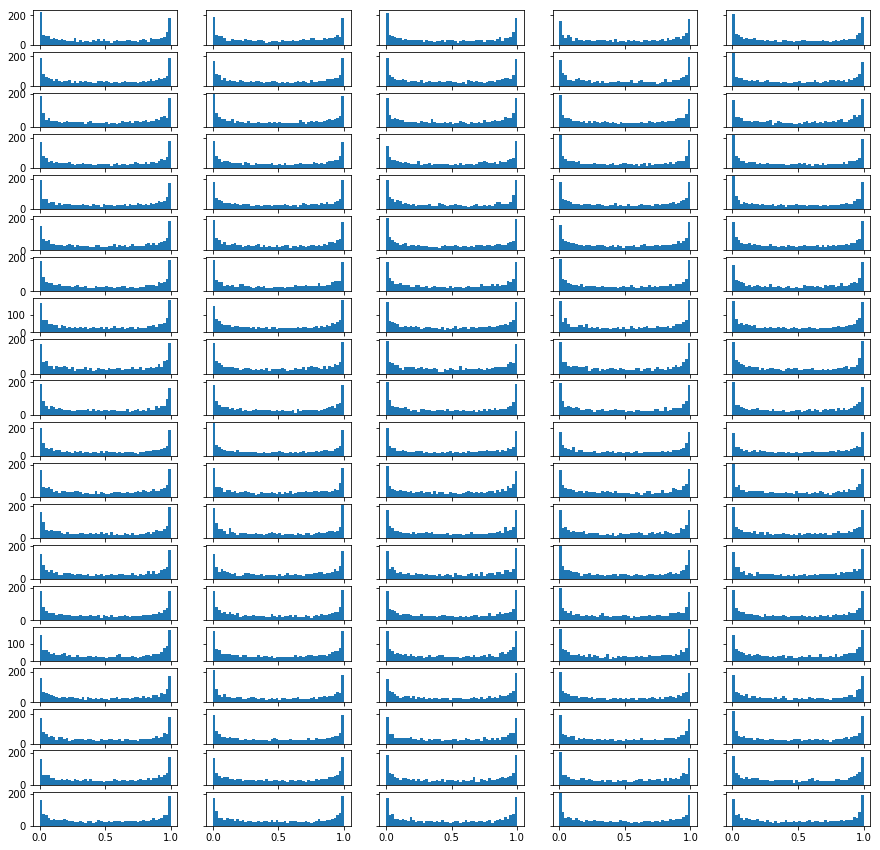

In [53]:
plot_quadMap()

As the above histograms show, these trajectories spend most of their time in extreme values of the state space (close to 0 and 1), with a much smaller fraction of time spent in the middle values. These trajectories start from random initial values, and the histograms look very similar despite different initial values.

### Exercise 3

In the lecture it was claim that, if $(\mathbb X, g)$ is a dynamical system, $g$ is continuous at $\hat x \in \mathbb X$ and, for some $x \in \mathbb X$, $g^t(x) \to \hat x$, then $\hat x$ is a steady state of $(\mathbb X, g)$.

Prove this.

#### Proof

Let $g$ be continuous at $\hat x \in \mathbb X$, which implies that for all $\epsilon > 0$, there exists a $\delta > 0$ such that for all $y$ where $|\hat x - y| < \delta$, we have that $|g(\hat x) - g(y)| < \epsilon$. Furthermore, because  $g^t(x) \to \hat x$, for each $\epsilon > 0$, there exists a $T$ such $|g^t(x) - \hat x| < \epsilon$ that for all $t > T$. Choose a $\hat T$ such that $|g^t(x) - \hat x| < \delta$ for all $ t > \hat T$. Then, consider the composition of $g$ with the limit of $g^t(x)$,

\begin{equation}
g(\lim_{t \to \infty} g^t(x)) = g(\hat x) = \hat x
\end{equation}
where the first inequality follows from $g^t(x) \to \hat x$, and the second inequality follows form the continuity of $g$. Therefore, by definition, $\hat x$ is a steady state of $(\mathbb X, g)$.
